# Statement

A companhia de seguros Proteja Seu Amanhã quer resolver algumas tarefas com a ajuda de aprendizado de máquina. É necessário avaliar a possibilidade de fazê-lo.

- Tarefa 1: Encontrar clientes semelhantes a um determinado cliente. Isso vai ajudar os agentes da empresa com tarefas de marketing.
- Tarefa 2: Predizer se um novo cliente provavelmente receberá um pagamento de seguro. Um modelo de predição pode ser melhor do que um modelo dummy?
- Tarefa 3: Predizer o número de pagamentos de seguro que um novo cliente provavelmente receberá usando um modelo de regressão linear.
- Tarefa 4: Proteger os dados pessoais dos clientes sem estragar o modelo da tarefa anterior. É necessário desenvolver um algoritmo de transformação de dados que tornaria difícil recuperar informações pessoais se os dados caíssem nas mãos erradas. Isso é chamado de mascaramento de dados ou ofuscação de dados. Mas os dados devem ser protegidos de forma que a qualidade dos modelos de aprendizado de máquina não piore. Você não precisa escolher o melhor modelo, só prove que o algoritmo funciona corretamente.

# Pré-processamento de dados & Exploração

## Inicialização

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

from sklearn.model_selection import train_test_split
import math

## Padronizando estilo dos gráficos

In [2]:
sns.set_theme(style="darkgrid")
sns.color_palette("pastel")


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

## Carregando os Dados

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

In [4]:
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Renomeando as colunas para tornar o código mais consistente com seu estilo.

In [6]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

**Features**: sexo, idade, salário e número de familiares do segurado.

**Target**: número de pagamentos de seguro recebidos por um segurado nos últimos cinco anos.

In [7]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
100,0,19.0,37300.0,1,0
1687,0,32.0,32000.0,2,0
1779,1,36.0,27400.0,2,0
3513,1,36.0,41300.0,0,0
4308,1,45.0,48900.0,2,1
1441,1,34.0,57600.0,0,0
4784,0,31.0,33200.0,3,0
3612,1,39.0,32800.0,5,0
2796,1,22.0,33300.0,4,0
461,0,42.0,58400.0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [9]:
# Corrigindo o tipo da variável idade (de float para int)
df['age'] = df['age'].astype('int')

In [10]:
# verificando se a conversão foi bem-sucedida
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [11]:
# Estatísticas descritivas dos dados.
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [12]:
# Assimetria dos dados
df.skew()

gender                0.004001
age                   0.515148
income               -0.036723
family_members        0.898297
insurance_benefits    3.845707
dtype: float64

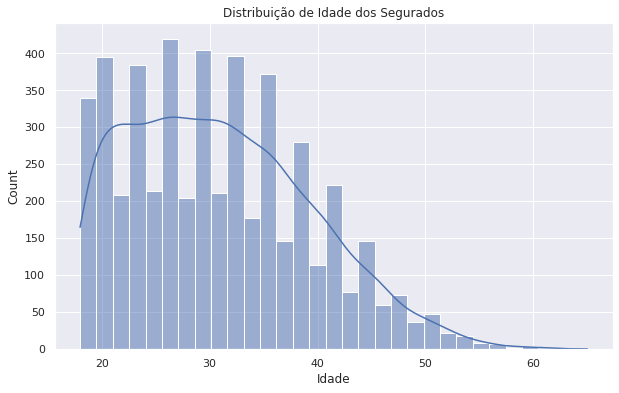

In [13]:
fig, ax = plt.subplots(figsize=(10,6));
sns.histplot(x='age', data=df, kde=True, ax=ax);
ax.set_xlabel('Idade');
ax.set_title('Distribuição de Idade dos Segurados');
plt.show()

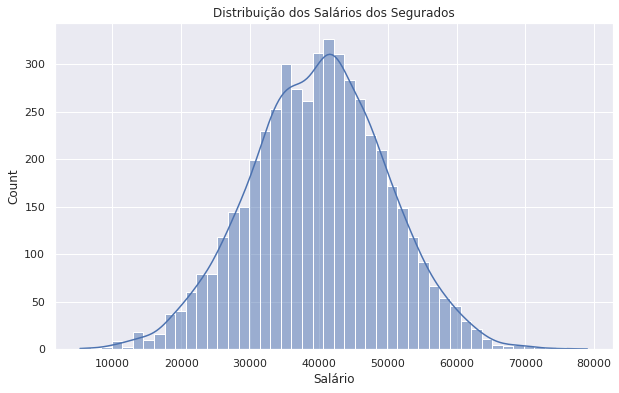

In [14]:
fig, ax = plt.subplots(figsize=(10,6));
sns.histplot(x='income', data=df, kde=True, ax=ax);
ax.set_xlabel('Salário');
ax.set_title('Distribuição dos Salários dos Segurados');
plt.show()

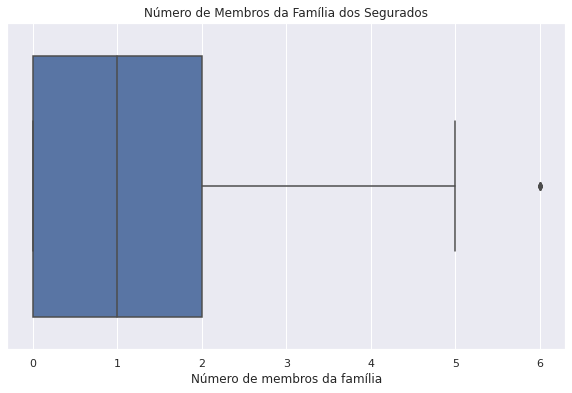

In [15]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='family_members', data=df, ax=ax);
ax.set_xlabel('Número de membros da família');
ax.set_title('Número de Membros da Família dos Segurados');
plt.show()


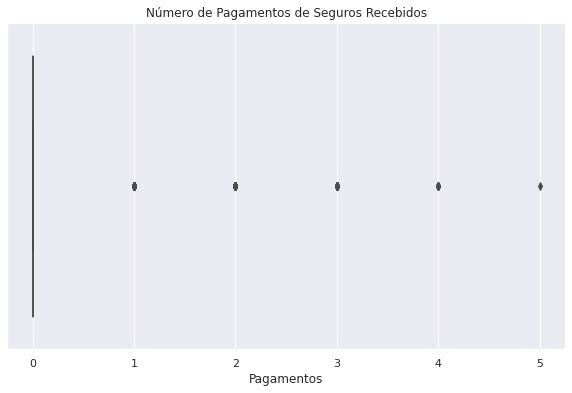

In [16]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='insurance_benefits', data=df, ax=ax);
ax.set_xlabel('Pagamentos');
ax.set_title('Número de Pagamentos de Seguros Recebidos');
plt.show()

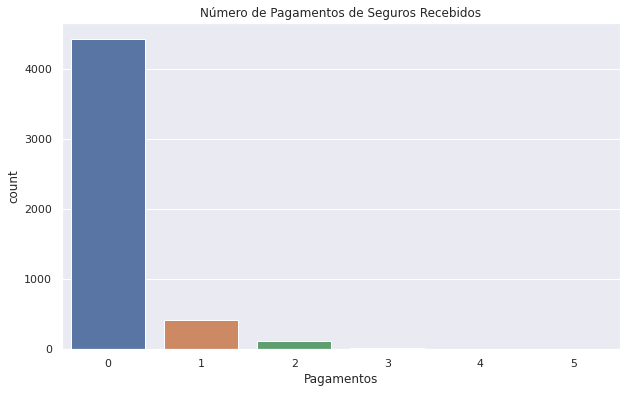

In [17]:
fig, ax = plt.subplots(figsize=(10,6));
sns.countplot(x='insurance_benefits', data=df, ax=ax);
ax.set_xlabel('Pagamentos');
ax.set_title('Número de Pagamentos de Seguros Recebidos');
plt.show()

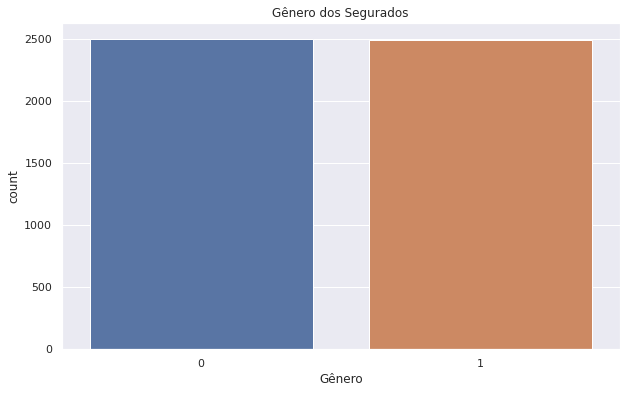

In [18]:
fig, ax = plt.subplots(figsize=(10,6));
sns.countplot(x='gender', data=df, ax=ax);
ax.set_xlabel('Gênero');
ax.set_title('Gênero dos Segurados');
plt.show()


**Conclusões**

Com base nos resultados da análise descritiva, é possível observar que a distribuição dos dados apresenta diferentes graus de assimetria, ou seja, a distribuição não é simétrica em relação à média. A skewness dos dados revela que a variável de "age" apresenta uma assimetria positiva moderada, o que mostra que há uma concentração maior de indivíduos mais jovens na amostra, o histograma mostra o mesmo e uma concentração maior na idade entre 20 e 40 anos. A variável "gender" apresentou uma assimetria praticamente nula, no gráfico de barra podemos ver que não há diferença na quantidade de índividos em relaão ao gênero.

Ja as variáveis de "family_members" e "insurance_benefits" apresentam uma assimetria positiva acentuada, ou seja há poucos indivíduos com muitos familiares e muitos indivíduos com poucos familiares e a grande maioria dos indivíduos possui poucos pagamentos de seguro, mas há outliers com um grande número de pagamentos. 

Já a variável de "income" apresenta uma assimetria negativa leve, sugere que há uma maior concentração de indivíduos com rendas mais altas na amostra.

Em resumo a análise descritiva dos dados mostra que:
A idade média é de 31 anos e a renda média é de cerca de 39.916 dólares. A maioria dos indivíduos na amostra tem menos de 3 membros na família e não possui nenhum pagamento de seguro.

## Automated Exploratory Data analysis (AED)

Vamos verificar rapidamente se existem determinados grupos de clientes observando o gráfico de pares.

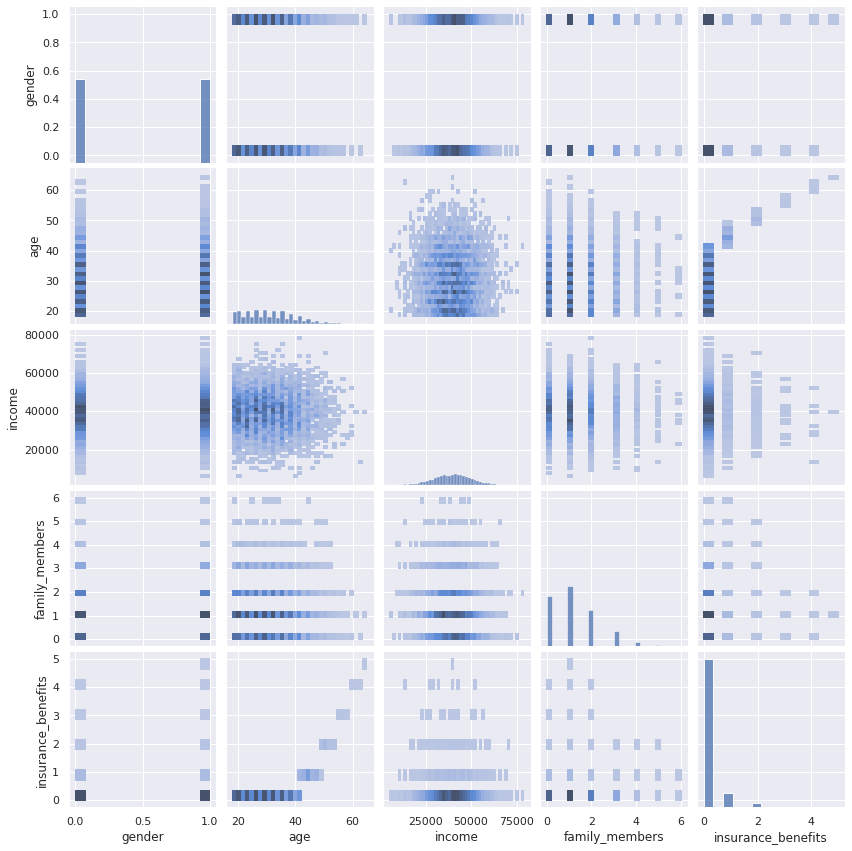

In [19]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

É um pouco difícil identificar grupos óbvios (clusters), pois é difícil combinar várias variáveis simultaneamente (para analisar distribuições multivariadas).

# Tarefa 1. Clientes Similares

Na linguagem de AM, é necessário desenvolver um procedimento que retorne k vizinhos mais próximos (objetos) para um determinado objeto com base na distância entre os objetos.

Para resolver a tarefa, podemos tentar diferentes métricas de distância.

A  função abaixo retorne k vizinhos mais próximos para um n-ésimo objeto com base em uma métrica de distância especificada. O número de pagamentos de seguro recebidos não é levado em consideração para esta tarefa. 

A função foi testada para quatro combinações de dois casos:
- Escalabilidade
  - os dados não são escalados
  - os dados escalados com o escalonador MaxAbsScaler 
- Métricas de distância
  - Euclidiana
  - Manhattan

In [20]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [21]:
def get_knn(df, n, k, metric):
    
    """
    Retorna os vizinhos mais próximos de k

    :param df: DataFrame pandas usado para encontrar objetos semelhantes dentro de    
    :param n: número do objeto pelo qual os vizinhos mais próximos são procurados
    :param k: o número dos vizinhos mais próximos a serem retornados
    :param metric: nome da métrica de distância    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalando os dados

In [22]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [23]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
1269,0.0,0.384615,0.345570,0.500000,0
4675,0.0,0.400000,0.592405,0.166667,0
326,1.0,0.707692,0.459494,0.000000,1
1093,1.0,0.630769,0.382278,0.000000,0
411,1.0,0.369231,0.416456,0.166667,0


Obtendo registros semelhantes para um determinado registro para cada combinação

In [24]:
get_knn(df[feature_names], n=0, k=3, metric='manhattan')

,gender,age,income,family_members,distance
0,1,41,49600.0,1,0.0
2022,1,41,49600.0,0,1.0
1225,0,42,49600.0,0,3.0


In [25]:
get_knn(df_scaled[feature_names], n=0, k=3, metric='manhattan')

,gender,age,income,family_members,distance
0,1.0,0.630769,0.627848,0.166667,0.000000
2689,1.0,0.630769,0.634177,0.166667,0.006329
133,1.0,0.615385,0.636709,0.166667,0.024245


In [26]:
get_knn(df[feature_names], n=0, k=3, metric='euclidean')

,gender,age,income,family_members,distance
0,1,41,49600.0,1,0.000000
2022,1,41,49600.0,0,1.000000
1225,0,42,49600.0,0,1.732051


In [27]:
get_knn(df_scaled[feature_names], n=0, k=3, metric='euclidean')

,gender,age,income,family_members,distance
0,1.0,0.630769,0.627848,0.166667,0.000000
2689,1.0,0.630769,0.634177,0.166667,0.006329
133,1.0,0.615385,0.636709,0.166667,0.017754


**Os dados escalados** 

Podemos verque os três primeiros vizinhos mais próximos têm a mesma renda, mas nos dados escalados, observamos o padrão entre idade, renda, sexo e membros da família. Isso sugere que a combinação de características é mais importante do que olhar apenas para a renda. Além disso, as distâncias entre os vizinhos mais próximos são diferentes entre os dados escalados e não escalados.

**Semelhança nos resultados usando a métrica de distância de Manhattan (independentemente da escalabilidade)** 

Com base nos 3 vizinhos mais próximos, os clientes tem as mesmas características demográficas (sexo, idade e renda), mas diferem em número de membros da família.

Na distância euclideana os clientes são semelhantes em renda e em idade, já o gênero e o número de membros da família podem não ser tão importantes para determinar a similaridade neste caso, pois são diferentes.

# Tarefa 2. É provável que o cliente receba um pagamento do seguro?

Esta é uma tarefa de classificação binária.

Avaliando se a abordagem da classificação kNN pode ser melhor do que um modelo dummy.

- Construção de um classificador baseado em kNN e medição da sua qualidade com a métrica F1 para k=1..10 tanto para os dados originais quanto para os escalados.
- Construção de um modelo dummy, que é aleatório para este caso. Esse modelo retorna com alguma probabilidade o valor "1". O modelo foi testado em quatro valores de probabilidade: 0, a probabilidade de fazer qualquer pagamento de seguro, 0,5, 1.

A probabilidade de fazer qualquer pagamento de seguro pode ser definida como:

$$
P(\text{pagamento de seguro recebido} = \frac{\text{número de clientes que receberam qualquer pagamento de seguro}}{\text{número total de clientes}})
$$


Os dados foram divididos na proporção 70:30 para os conjuntos de treinamento/teste.

In [28]:
# Criando nova coluna com classificação binária do pagamento de seguros
# A condição retorna True or False e a conversão para inteiro tranforma em 0 e 1
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [29]:
# Verificando o desequilíbrio de classes com value_counts()
df['insurance_benefits_received'].value_counts()


0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [30]:
features = df.drop('insurance_benefits_received', axis=1)
target = df['insurance_benefits_received']

In [31]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.30, random_state=42)

In [32]:
# Escalando dados para contornar desequilíbrio de classes
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [33]:
#Função que calcula a métrica F1 e retorna a matriz de confusão
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score}')
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de Confusão')
    print(cm)

### Modelo dummy

In [34]:
# gerando a saída de um modelo aleatório

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [35]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'A probabilidade: {P:.2f}')
    y_pred_rnd = rnd_model_predict (P, size=len(target))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

A probabilidade: 0.00
F1: 0.0
Matriz de Confusão
[[0.8872 0.    ]
 [0.1128 0.    ]]

A probabilidade: 0.11
F1: 0.12072072072072074
Matriz de Confusão
[[0.7914 0.0958]
 [0.0994 0.0134]]

A probabilidade: 0.50
F1: 0.19807883405101026
Matriz de Confusão
[[0.456  0.4312]
 [0.053  0.0598]]

A probabilidade: 1.00
F1: 0.20273184759166066
Matriz de Confusão
[[0.     0.8872]
 [0.     0.1128]]



### Modelo de Classificação KNN

In [36]:
# dados não escalados
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train, target_train)
    predictions = knn.predict(features_test)
    print(f'k={k}')
    f1 = eval_classifier(target_test, predictions)

k=1
F1: 0.6546762589928057
Matriz de Confusão
[[0.87533333 0.01733333]
 [0.04666667 0.06066667]]
k=2
F1: 0.3762376237623762
Matriz de Confusão
[[0.89066667 0.002     ]
 [0.082      0.02533333]]
k=3
F1: 0.3888888888888889
Matriz de Confusão
[[0.884      0.00866667]
 [0.07933333 0.028     ]]
k=4
F1: 0.15555555555555553
Matriz de Confusão
[[0.88933333 0.00333333]
 [0.098      0.00933333]]
k=5
F1: 0.16842105263157894
Matriz de Confusão
[[0.884      0.00866667]
 [0.09666667 0.01066667]]
k=6
F1: 0.09411764705882353
Matriz de Confusão
[[8.92000000e-01 6.66666667e-04]
 [1.02000000e-01 5.33333333e-03]]
k=7
F1: 0.10465116279069768
Matriz de Confusão
[[0.89133333 0.00133333]
 [0.10133333 0.006     ]]
k=8
F1: 0.024539877300613494
Matriz de Confusão
[[0.89266667 0.        ]
 [0.106      0.00133333]]
k=9
F1: 0.03658536585365854
Matriz de Confusão
[[0.89266667 0.        ]
 [0.10533333 0.002     ]]
k=10
F1: 0.03658536585365854
Matriz de Confusão
[[0.89266667 0.        ]
 [0.10533333 0.002     ]]


In [37]:
# Dados escalados
for k in range(1, 11):
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(features_train_scaled, target_train)
    predictions_scaled = knn_scaled.predict(features_test_scaled)
    print(f'k={k}')
    f1_scaled = eval_classifier(target_test, predictions_scaled)

k=1
F1: 1.0
Matriz de Confusão
[[0.89266667 0.        ]
 [0.         0.10733333]]
k=2
F1: 1.0
Matriz de Confusão
[[0.89266667 0.        ]
 [0.         0.10733333]]
k=3
F1: 1.0
Matriz de Confusão
[[0.89266667 0.        ]
 [0.         0.10733333]]
k=4
F1: 1.0
Matriz de Confusão
[[0.89266667 0.        ]
 [0.         0.10733333]]
k=5
F1: 1.0
Matriz de Confusão
[[0.89266667 0.        ]
 [0.         0.10733333]]
k=6
F1: 1.0
Matriz de Confusão
[[0.89266667 0.        ]
 [0.         0.10733333]]
k=7
F1: 1.0
Matriz de Confusão
[[0.89266667 0.        ]
 [0.         0.10733333]]
k=8
F1: 1.0
Matriz de Confusão
[[0.89266667 0.        ]
 [0.         0.10733333]]
k=9
F1: 1.0
Matriz de Confusão
[[0.89266667 0.        ]
 [0.         0.10733333]]
k=10
F1: 1.0
Matriz de Confusão
[[0.89266667 0.        ]
 [0.         0.10733333]]


**Conclusões**
Os resultados mostram que o dimensionamento dos recursos tem um impacto significativo no desempenho do Classificador KNN. Quando as características não são escaladas, a pontuação F1 é bastante baixa e varia muito entre diferentes valores de k, indicando que o modelo não é capaz de distinguir efetivamente entre as duas classes. Já nas características escaladas, a pontuação F1 é consistentemente 1,0 para todos os valores de k, o que significa que o modelo é capaz de classificar perfeitamente os dados.

As matrizes de confusão também mostram que dados não escalados apresentam um grande número de falsos positivos e falsos negativos, provavelmente o modelo não é capaz de identificar as características importantes que distinguem as duas classes. O que não é verdade para as características dimensionadas, a matriz de confusão mostra que não há falsos positivos ou falsos negativos.

Já o modelo dummy obteve uma pontuação F1 de 0 ou próxima a 0 indicando desempenho ruim provavelmente porque está prevendo todas ou a maioria das amostras como negativas ou positivas.

# Tarefa 3. Regressão (com Regressão Linear)

Avaliação da métrica REQM para um modelo de Regressão Linear.

Construção e implementação de Regressão Linear com recurso de Álgebra linear. Foi utilizado a métrica REQM para os dados originais e os escalados. 

Foŕmula:
- $X$ — matriz de características, cada linha é um caso, cada coluna é uma característica, a primeira coluna consiste em unidades
- $y$ — objetivo (um vetor)
- $\hat{y}$ — objetivo estimado (um vetor)- 
- $w$ — vetor de peso

A tarefa de regressão linear na linguagem de matrizes pode ser formulada como
$$
y = Xw
$$

O objetivo do treinamento, então, é encontrar o $w$ que minimizaria a distância L2 (EQM) entre $Xw$ e $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Há uma solução analítica para a questão acima:

$$
w = (X^T X)^{-1} X^T y
$$

A fórmula acima pode ser usada para encontrar os pesos $w$ e este último pode ser usado para calcular valores preditos:

$$
\hat{y} = X_{val}w
$$

Criando função que Calcula regressão linear

In [38]:
class MyLinearRegression:
    
    # Contrutor: cria e inicializa os pesos como None.
    def __init__(self):
        
        self.weights = None
    
    # Método para ajustar o modelo aos dados. O argumento X é uma matriz de dados de entrada e y é um vetor de valores de objetivo.
    def fit(self, X, y):
        
        # Essa variável adiciona uma coluna de uns à matriz de entrada X (termo de interceptação no modelo de regressão linear).
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Essa fórmula calcula o inverso da matriz X2.T.dot(X2), multiplica-o por X2.T e depois pelos valores de objetivo y.
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
    
    # Método é usado para prever os valores de destino para novos dados de entrada
    def predict(self, X):
        
        # Adicionando uma coluna de uns à X (termo de interceptação no modelo de regressão linear).
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Calcula os valores objetivos usando o produto escalar dos dados de entrada e os pesos do modelo de regressão linear.
        y_pred = X2.dot(self.weights)
        
        return y_pred


Função para o cálculo da métrica REQM

In [39]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'REQM: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [40]:
# Transformando features em matriz
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
# Tranformando target em um vetor
y = df['insurance_benefits'].to_numpy()

#Separando os dados em conjunto de treinamento e teste na proporção 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Instanciando o objeto
lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
REQM: 0.34
R2: 0.66


**Conclusões**

O valor REQM mais baixo indica que as previsões do modelo são precisas. O valor de R2 representa o coeficiente de determinação, que indica o quão bem o modelo se ajusta aos dados. Valores mais altos indicando um melhor ajuste. Nesse caso, o valor de R2 de 0,66 sugere que o modelo explica 66% da variância da variável alvo.

# Tarefa 4. Ofuscando dados

O ofuscamento ou mascaramento dos dados tem objetivo de proteger dados pessoais, isso pode ser feito por meio da multiplicação das características numéricas (elas podem ser vistos como a matriz $X$) por uma matriz invertível $P$, ou seja: 

$$
X' = X \times P
$$

In [41]:
# Filtrando dataframe por features
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [42]:
# Transformando dataframe em matriz
X = df_pn.to_numpy()

Gerando uma matriz $P$ aleatória.

In [43]:
rng = np.random.default_rng(seed=42)
# Gerando matriz quadrada aleatória
P = rng.random(size=(X.shape[1], X.shape[1]))

Verificando se a matriz $P$ é invertível

In [44]:
det_P = np.linalg.det(P)
if det_P != 0:
    print("Matriz P é invertível")
else:
    print("Matriz P não é invertível")


Matriz P é invertível


In [45]:
#Invertendo matriz P
P_inv = np.linalg.inv(P)
P_inv

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

In [46]:
# Ofuscando features
X_inv = np.dot(X, P)

Recuperando os dados originais de $X′$ a partir de $P$:

$$
P: X = np.dot(np.linalg.inv(P_inv), X_inv.T).T
$$

In [47]:
P_X = np.dot(X_inv, P_inv)
P_X

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Imprima todos os três casos para alguns clientes- Os dados originais
- O transformado
- O invertido (recuperado)

In [48]:
selected_rows = df_pn.iloc[[0, 1, 2]]

X = selected_rows.to_numpy()

rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
X_transformed = np.dot(X, P)


P_inv = np.linalg.inv(P)
X_recovered = np.dot(X_transformed, P_inv)

for i in range(len(selected_rows)):
    client = selected_rows.index[i]
    original_data = selected_rows.iloc[i].values
    transformed_data = X_transformed[i]
    recovered_data = X_recovered[i]
    print(f"Client {client}:")
    print("Original data:", original_data)
    print("Transformed data:", transformed_data)
    print("Recovered data:", recovered_data)
    print()

Client 0:
Original data: [1.00e+00 4.10e+01 4.96e+04 1.00e+00]
Transformed data: [ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
Recovered data: [1.00e+00 4.10e+01 4.96e+04 1.00e+00]

Client 1:
Original data: [0.0e+00 4.6e+01 3.8e+04 1.0e+00]
Transformed data: [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
Recovered data: [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]

Client 2:
Original data: [    0.    29. 21000.     0.]
Transformed data: [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
Recovered data: [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]



Alguns valores nos dados recuperados podem não ser exatamente iguais aos dados originais devido a erros de precisão numérica. Os cálculos de matriz envolvem aritmética de ponto flutuante, que pode introduzir pequenos erros de arredondamento nos resultados. Esses erros podem se acumular durante os cálculos e resultar em pequenas diferenças entre os dados originais e os recuperados. No entanto, essas diferenças são tipicamente muito pequenas e não afetam a precisão geral dos cálculos.

## Prova analítica de que a ofuscação de dados pode funcionar com a Regressão Linear

A qualidade da regressão linear, medida pelo REQM, não será afetada pelo método de ofuscação de dados, pois esse método apenas altera os dados de X para XP, mas não altera a relação entre X e y, que é capturada pelo vetor de peso w. Portanto, o modelo de regressão linear ainda será capaz de fazer previsões precisas nos dados ofuscados XP, assim como faria nos dados originais X.

Partindo do princípio que:
$$
y = Xw
$$

onde w é o vetor de pesos da regressão obtido por:
$$
w = (X^T X)^{-1} X^T y
$$

Usando os valores previstos ofuscados, ou seja, XP:

$$
y_P = XP w_P
$$

onde $w_P$ é o vetor peso dado por:

$$
w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Para mostrar que os valores previstos são os mesmos, precisamos mostrar que $y = y_P$. Substituindo as expressões para $y$ e $y_P$, obtemos:

$$
Xw = XPw_P
$$

Multiplicando ambos os lados por $$[(XP)^T XP]^{-1} (XP)^T$$, obtemos:

$$
[(XP)^T XP]^{-1} (XP)^T Xw = w_P
$$

Mas sabemos que $XP = X$ \ $P$, então podemos substituir isso na equação acima para obter:

$$
[(X^T P^T P X)^{-1} X^T P^T P] Xw = w_P
$$

Expandindo a expressão $ (X\ P)^T X\ P $, obtemos:

$$
[(X^T P^T P X)^{-1} X^T P^T P] Xw = w_P
$$

Mas sabemos que $P^T P$ é uma matriz identidade (já que P é uma matriz de ofuscação), então podemos simplificar a equação acima para:

$$
[(X^T X)^{-1} X^T] Xw = w_P
$$

Substituindo a expressão por w, obtemos:

$$
[(X^T X)^{-1} X^T] X(X^T X)^{-1} X^T y = w_P
$$

Simplificando a expressão acima, obtemos:

$$
w_P = w
$$

Portanto, os vetores de peso obtidos usando os dados originais X e os dados ofuscados XP são os mesmos. Assim, os valores previstos obtidos usando Xw e XPw_P também serão os mesmos. Isso prova que o método de ofuscação não afetará a regressão linear em termos de valores previstos.


Simplificando a fórmula para w_P derivada acima, obtemos:

$$
w_P = [(XP)^T XP]^{-1} (XP)^T y
$$
$$
w_P = [((X \ P)^T X \ P)]^{-1} (X \ P)^T y
$$
$$
w_P = [(X^T P^T P X)^{-1} X^T P^T] y
$$
$$
w_P = [(X^T X)^{-1} X^T] y
$$

Isso mostra que w_P é igual a w, ou seja, o vetor peso obtido usando os dados originais X. Portanto, os valores previstos com w_P serão iguais aos valores previstos com w, dados por:

$$
y_P = XPw_P = X \ Pw_P = Xw = y
$$

## Teste de regressão linear com ofuscação de dados

Prova de que a Regressão Linear pode funcionar computacionalmente com a transformação de ofuscação escolhida.

Nos dados não ofuscados

In [49]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
REQM: 0.34
R2: 0.66


Nos dados ofuscados

In [50]:
XP = X @ P
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

XP_train, XP_test, y_train, y_test = train_test_split(XP, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
REQM: 0.34
R2: 0.66


**Conclusões**

Observamos que os resultados não diferem.

# Conclusões

**Tarefa 1:** Os dados não dimensionados podem afetar o algoritmo kNN, pois podem ignorar combinações importantes de características. Usando a métrica de distância de Manhattan, foi possível observar que os clientes têm características demográficas semelhantes, mas diferem no número de membros da família. Em contraste, usando a distância euclidiana, os clientes eram semelhantes em renda e idade, mas diferentes em gênero e número de membros da família.

**Tarefa 2:** Foi criado e testado um modelo de classificação aleatório e um modelo de classificação kNN para os dados originais e dimensionados. A métrica F1 foi calculada para avaliar o desempenho do modelo.

Os resultados mostram que o dimensionamento dos recursos tem um impacto significativo no desempenho do Classificador KNN. Quando as características não são escalonadas, a pontuação F1 é bastante baixa e varia muito entre diferentes valores de k, indicando que o modelo não é capaz de distinguir efetivamente entre as duas classes. Já nas características escalonadas, a pontuação F1 é consistentemente 1,0 para todos os valores de k, o que significa que o modelo é capaz de classificar perfeitamente os dados.

As matrizes de confusão também mostram que dados não escalonadas apresentam um grande número de falsos positivos e falsos negativos, provavelmente o modelo não é capaz de identificar as características importantes que distinguem as duas classes. O que não é verdade para as características dimensionadas, a matriz de confusão mostra que não há falsos positivos ou falsos negativos.

É  importante considerar a escalabilidade das características na etapa de pré-processamento ao usar o KNN classificador, pois ajuda a melhorar o desempenho do modelo.

**Tarefa 3:** Foi implementada a solução de regressão linear usando operações matriciais e calculo de REQM, que foi encontrado como 0,34. Adicionalmente, o valor de R2 foi de 0,66, indicando que o modelo explica 66% da variância da variável dependente.


**Tarefa 4:** Com os dados ofuscados com uma matriz P invertível aleatória e recuperada foi possível obter provas analíticas e computacionais de que a transformação não afeta o resultado da Regressão Linear e nem o REQM.